# Feature Selection means selecting the subset of features of our given data

## If after a particular Threshold value  we are still increasing the number of features in our dataset we are hampering the model growth  i.e at that point our model is learning too much from irrelevant data this is known as curse of Dimensinailty

## Mobile Price Classification using test and train

## We will use Univariate Method i.e it will tell which  independent feature has a strong relation with output

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


### SelectKbest will select k best features

In [3]:
data=pd.read_csv('train.csv')
data.head(n=3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


## Now divide the data into X and Y i.e
## Price range is the output

In [4]:
# Take all the rows and only 20 cols
X=data.iloc[:,0:20]

# Take all the rows and only Last col
Y=data.iloc[:,-1]

In [5]:
# Say we want to select k best features
best_feature=SelectKBest(score_func=chi2,k=10)


In [9]:
# fit actually means Training 
# So this will be trained on X and Y values

fit=best_feature.fit(X,Y)
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [17]:
dfscore=pd.DataFrame(fit.scores_)
dfscore

,0
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [18]:
X.columns
dfcolumns=X.columns
dfcolumns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [20]:
dfcolumns=pd.DataFrame(X.columns)
dfscore=pd.DataFrame(fit.scores_)

In [22]:
featurecols=pd.concat([dfcolumns,dfscore],axis=1)
featurecols.head(n=3)

,0,0
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366


## First column is our variable and second is our relevance

In [24]:
featurecols.columns=['Feature','Score']
featurecols.head(n=3)

,Feature,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366


## Now we want to sort on the basics of Descending values

In [26]:
featurecols.sort_values(by='Score',ascending=False)

,Feature,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


## We can also logically see that Ram ,px height are among those features which make sense while Predicting the Price

# Now we will be selecting the features based on the technique of feature importance i.e based on the Tree Based Model of Sicket Learn

In [27]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


model=RandomForestClassifier()
model.fit(X,Y)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
model=RandomForestClassifier()
model.fit(X,Y)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
model.feature_importances_

array([0.07577857, 0.00663284, 0.0273988 , 0.00752278, 0.02924153,
       0.00545585, 0.03887648, 0.02320543, 0.04029999, 0.02720146,
       0.0274096 , 0.06242012, 0.05719541, 0.46471099, 0.02930628,
       0.02956466, 0.02885217, 0.00507748, 0.00764296, 0.0062066 ])

## The above are the Importance of the features and all will sum up to 1

In [32]:
aman=pd.DataFrame(model.feature_importances_,index=X.columns,columns=['Importance'])
aman

,Importance
battery_power,0.075779
blue,0.006633
clock_speed,0.027399
dual_sim,0.007523
fc,0.029242
four_g,0.005456
int_memory,0.038876
m_dep,0.023205
mobile_wt,0.040300
n_cores,0.027201


In [36]:
aman=aman.sort_values(by='Importance',ascending=False)

<BarContainer object of 20 artists>

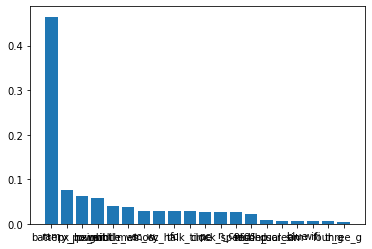

In [37]:
plt.bar(aman.index,aman['Importance'])

## Lets increase the size of bar graph

<BarContainer object of 20 artists>

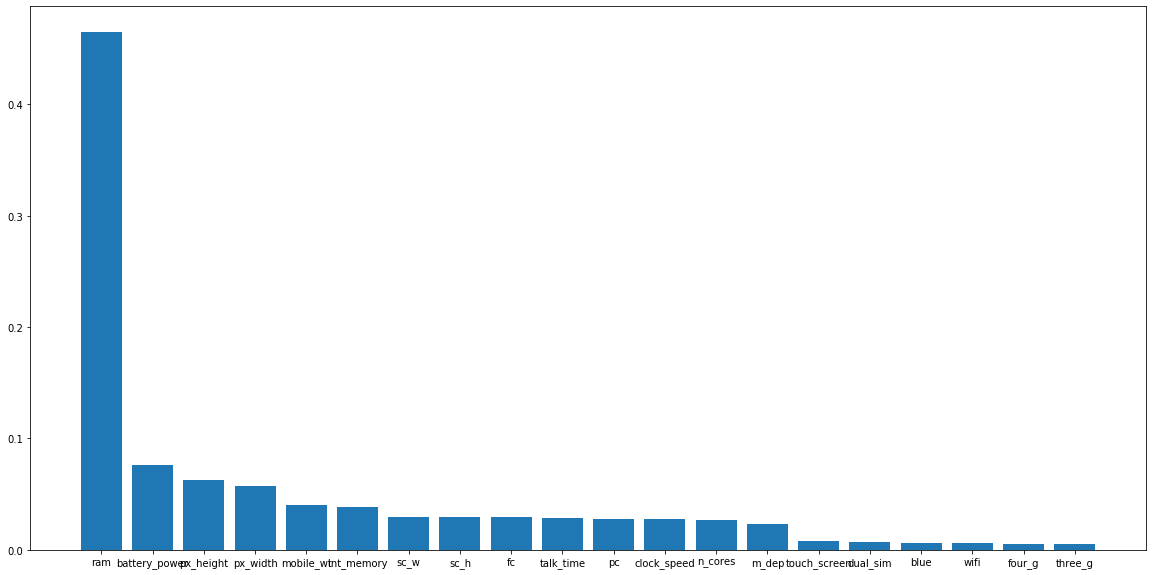

In [38]:
plt.figure(figsize=(20,10))
plt.bar(aman.index,aman['Importance'])

## One Last Method we can use is Corelation Matrix

In [39]:
datacor=data.corr()
datacor

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


## Obiviosly If Both the Feature are same then accuracy is 100 percent or 1.0000
## So we can see all the diagonal entries are 100 percent i.e perfect Corelation

## We have to find such features that are highely Corelated with Price Range

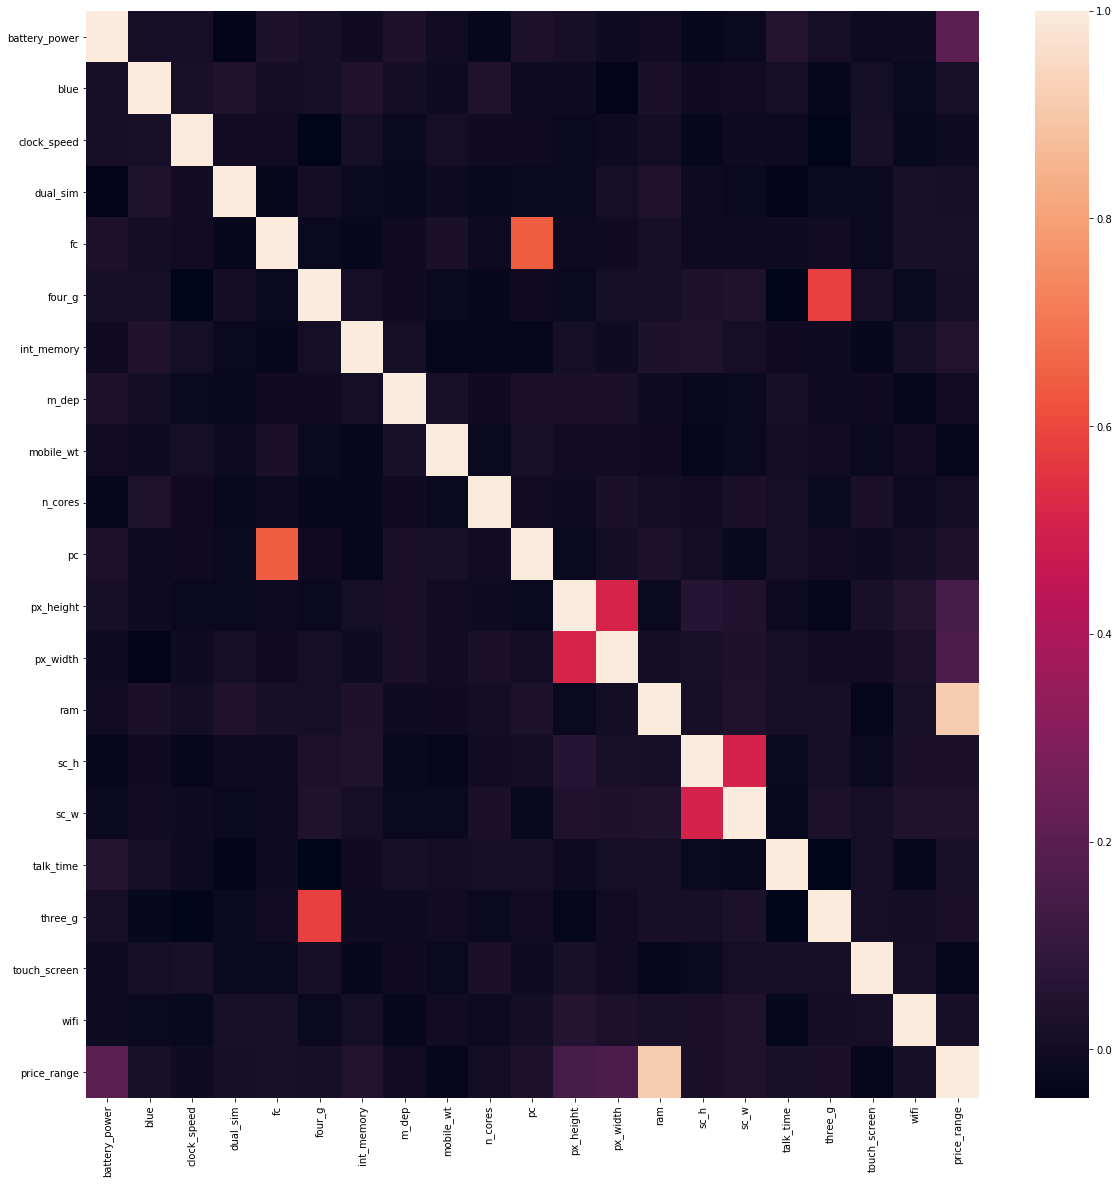

In [40]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(datacor)